In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats
import numpy as np
from scipy.stats import ttest_ind
from scipy.stats import norm

In [4]:
# Load file
mexico_listing = pd.read_csv(r'C:\Users\ysy\Documents\IS630_ Stats thinking for data science\Assignment\Group Assignment\airbnb_datasets_py_files\mexico_listings.csv', encoding='utf-8')
mexico_listing.describe()

# Drop rows where 'price' is NaN
mexico_listing = mexico_listing.dropna(subset=['price'])

# Filter listings with at least 30 reviews
filtered_listings = mexico_listing[mexico_listing['number_of_reviews'] >= 30]

# Extract the top 100 listings with the highest review scores from the filtered data
top_100_listings = filtered_listings.sort_values(by='review_scores_rating', ascending=False).head(100)

# Select relevant columns
top_listing_ids = top_100_listings['id']
top_listing_prices = top_100_listings['price']
top_review_scores = top_100_listings['review_scores_rating']

# Convert prices to SGD
mxn_to_sgd = 0.076
top_mexico_listing_prices_sgd = (top_listing_prices * mxn_to_sgd).round(2)

top_100_listings['price_sgd'] = (top_100_listings['price'] * mxn_to_sgd).round(2)
top_100_listings.to_csv(r'C:\Users\ysy\Documents\IS630_ Stats thinking for data science\Assignment\Group Assignment\airbnb_datasets_py_files\top_100_mexico_listings.csv', index=False)

print("Data saved to top_100_mexico_listings.csv")

# Convert columns to lists for iteration
top_listing_ids_list = top_listing_ids.tolist()
top_mexico_listing_prices_list = top_mexico_listing_prices_sgd.tolist()
top_review_scores_list = top_review_scores.tolist()

# Print out listing information including review scores rating
for listing_id, price_sgd, review_score in zip(top_listing_ids_list, top_mexico_listing_prices_list, top_review_scores_list):
    # Get the number of reviews for each listing ID
    num_reviews = mexico_listing.loc[mexico_listing['id'] == listing_id, 'number_of_reviews'].values[0]
    price = mexico_listing.loc[mexico_listing['id'] == listing_id, 'price'].values[0]
    print(f"Listing ID: {listing_id}, Number of Reviews: {num_reviews}, Price (SGD): {price_sgd}, Review Score: {review_score}")

Data saved to top_100_mexico_listings.csv
Listing ID: 36695730.0, Number of Reviews: 53, Price (SGD): 87.4, Review Score: 5.0
Listing ID: 1.03788e+18, Number of Reviews: 49, Price (SGD): 87.55, Review Score: 5.0
Listing ID: 9298845.0, Number of Reviews: 87, Price (SGD): 76.0, Review Score: 5.0
Listing ID: 54048387.0, Number of Reviews: 37, Price (SGD): 91.2, Review Score: 5.0
Listing ID: 7.73157e+17, Number of Reviews: 31, Price (SGD): 56.92, Review Score: 5.0
Listing ID: 32789000.0, Number of Reviews: 100, Price (SGD): 98.19, Review Score: 5.0
Listing ID: 42794424.0, Number of Reviews: 30, Price (SGD): 129.2, Review Score: 5.0
Listing ID: 1.01898e+18, Number of Reviews: 34, Price (SGD): 91.43, Review Score: 5.0
Listing ID: 53300310.0, Number of Reviews: 31, Price (SGD): 302.02, Review Score: 5.0
Listing ID: 9.33506e+17, Number of Reviews: 53, Price (SGD): 100.4, Review Score: 5.0
Listing ID: 6.85342e+17, Number of Reviews: 81, Price (SGD): 136.04, Review Score: 5.0
Listing ID: 4278961

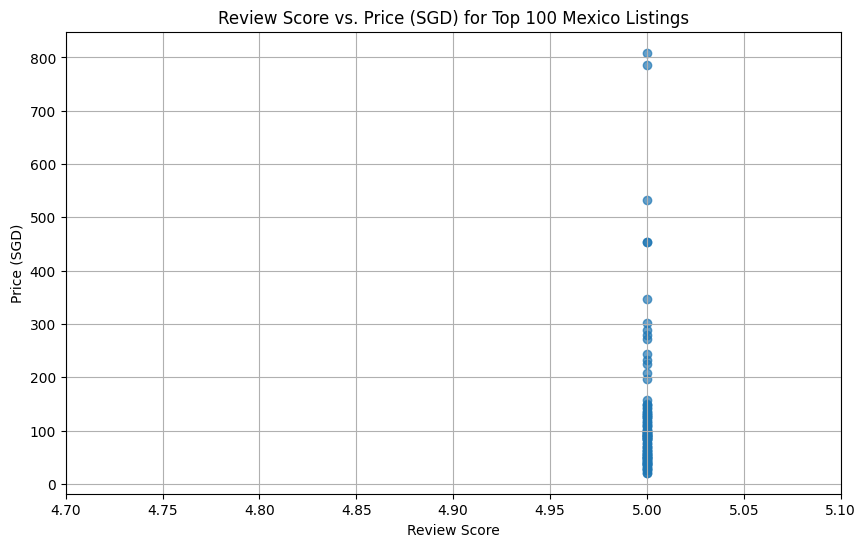

In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(top_review_scores_list, top_mexico_listing_prices_list, alpha=0.7)
plt.title('Review Score vs. Price (SGD) for Top 100 Mexico Listings')
plt.xlabel('Review Score')
plt.ylabel('Price (SGD)')
plt.xlim(left=4.7, right=5.1)
plt.grid(True)
plt.show()

In [6]:
# Extract the bottom 100 listings with the lowest review scores from the filtered data
bottom_100_listings = filtered_listings.sort_values(by='review_scores_rating', ascending=True).head(100)

# Select relevant columns
bottom_listing_ids = bottom_100_listings['id']
bottom_listing_prices = bottom_100_listings['price']
bottom_review_scores = bottom_100_listings['review_scores_rating']

# Convert prices to SGD
bottom_mexico_listing_prices_sgd = (bottom_listing_prices * mxn_to_sgd).round(2)

bottom_100_listings['price_sgd'] = (bottom_100_listings['price'] * mxn_to_sgd).round(2)
bottom_100_listings.to_csv(r'C:\Users\ysy\Documents\IS630_ Stats thinking for data science\Assignment\Group Assignment\airbnb_datasets_py_files\bottom_100_mexico_listings.csv', index=False)

print("Data saved to bottom_100_mexico_listings.csv")

# Convert columns to lists for iteration
bottom_listing_ids_list = bottom_listing_ids.tolist()
bottom_mexico_listing_prices_list = bottom_mexico_listing_prices_sgd.tolist()
bottom_review_scores_list = bottom_review_scores.tolist()

# Print out listing information including review scores rating
for listing_id, price_sgd, review_score in zip(bottom_listing_ids_list, bottom_mexico_listing_prices_list, bottom_review_scores_list):
    # Get the number of reviews for each listing ID
    num_reviews = mexico_listing.loc[mexico_listing['id'] == listing_id, 'number_of_reviews'].values[0]
    price = mexico_listing.loc[mexico_listing['id'] == listing_id, 'price'].values[0]
    print(f"Listing ID: {listing_id}, Number of Reviews: {num_reviews}, Price (SGD): {price_sgd}, Review Score: {review_score}")

Data saved to bottom_100_mexico_listings.csv
Listing ID: 35485317.0, Number of Reviews: 35, Price (SGD): 280.9, Review Score: 3.86
Listing ID: 48093466.0, Number of Reviews: 64, Price (SGD): 47.88, Review Score: 3.98
Listing ID: 9.27851e+17, Number of Reviews: 32, Price (SGD): 32.76, Review Score: 4.0
Listing ID: 9.90043e+17, Number of Reviews: 63, Price (SGD): 23.18, Review Score: 4.08
Listing ID: 12647508.0, Number of Reviews: 45, Price (SGD): 60.8, Review Score: 4.09
Listing ID: 1.00501e+18, Number of Reviews: 33, Price (SGD): 90.44, Review Score: 4.12
Listing ID: 8.23966e+17, Number of Reviews: 31, Price (SGD): 13.15, Review Score: 4.13
Listing ID: 34560925.0, Number of Reviews: 41, Price (SGD): 25.38, Review Score: 4.15
Listing ID: 47236500.0, Number of Reviews: 60, Price (SGD): 80.56, Review Score: 4.15
Listing ID: 9.10886e+17, Number of Reviews: 33, Price (SGD): 25.0, Review Score: 4.15
Listing ID: 44104083.0, Number of Reviews: 38, Price (SGD): 30.4, Review Score: 4.21
Listing 

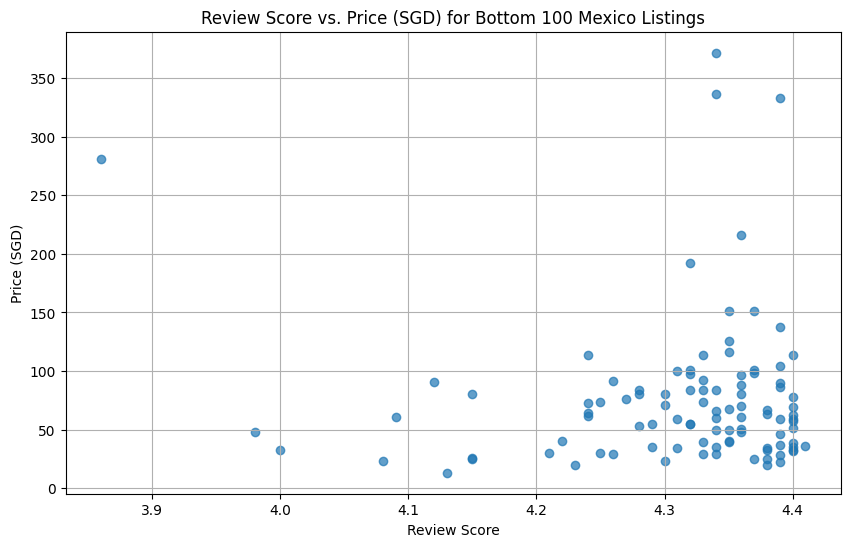

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(bottom_review_scores_list, bottom_mexico_listing_prices_list, alpha=0.7)
plt.title('Review Score vs. Price (SGD) for Bottom 100 Mexico Listings')
plt.xlabel('Review Score')
plt.ylabel('Price (SGD)')
plt.grid(True)
plt.show()

In [8]:
# Load the two CSV files into DataFrames
top_100 = pd.read_csv(r'C:\Users\ysy\Documents\IS630_ Stats thinking for data science\Assignment\Group Assignment\airbnb_datasets_py_files\top_100_mexico_listings.csv')
bottom_100 = pd.read_csv(r'C:\Users\ysy\Documents\IS630_ Stats thinking for data science\Assignment\Group Assignment\airbnb_datasets_py_files\bottom_100_mexico_listings.csv')

# Concatenate the two DataFrames
top_bottom_100 = pd.concat([top_100, bottom_100], ignore_index=True)

# Save the combined DataFrame to a new CSV file
top_bottom_100.to_csv(r'C:\Users\ysy\Documents\IS630_ Stats thinking for data science\Assignment\Group Assignment\airbnb_datasets_py_files\combined_top_bottom_mexico_listings.csv', index=False)

print("Data saved to combined_top_bottom_mexico_listings.csv")

Data saved to combined_top_bottom_mexico_listings.csv


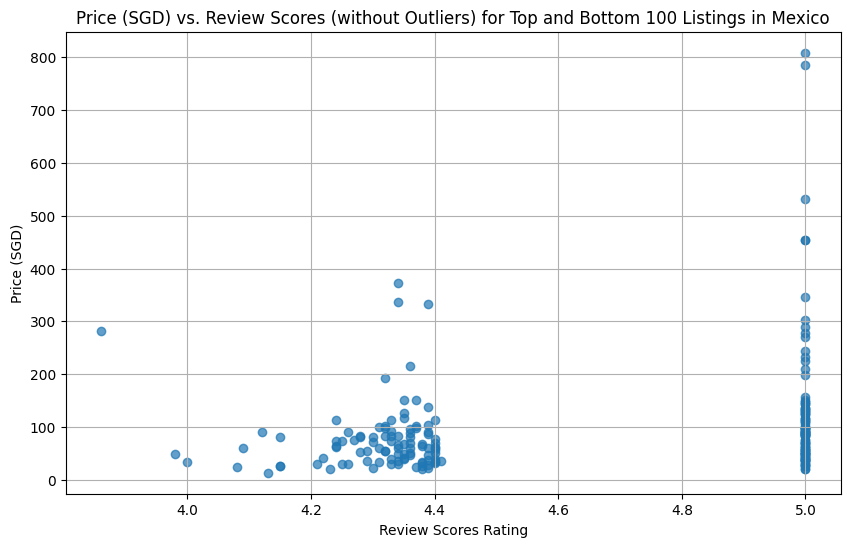

In [8]:
top_bottom_mexico_100 = pd.read_csv(r'C:\Users\ysy\Documents\IS630_ Stats thinking for data science\Assignment\Group Assignment\airbnb_datasets_py_files\combined_top_bottom_mexico_listings.csv')


plt.figure(figsize=(10, 6))
plt.scatter(top_bottom_mexico_100['review_scores_rating'], top_bottom_mexico_100['price_sgd'], alpha=0.7)
plt.title('Price (SGD) vs. Review Scores (without Outliers) for Top and Bottom 100 Listings in Mexico')
plt.xlabel('Review Scores Rating')
plt.ylabel('Price (SGD)')
plt.grid(True)
plt.show()

In [10]:
# Define high and low review score groups (e.g., above 4.5 as high)
high_score_group = top_bottom_mexico_100[top_bottom_mexico_100['review_scores_rating'] > 4.5]['price_sgd']
low_score_group = top_bottom_mexico_100[top_bottom_mexico_100['review_scores_rating'] <= 4.5]['price_sgd']

# Perform the independent t-test
t_stat, p_value = ttest_ind(high_score_group, low_score_group, equal_var=False, alternative='two-sided') 
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in average prices between high and low review score groups.")
else:
    print("Fail to reject the null hypothesis: No significant difference in average prices between the groups.")

T-Statistic: 3.29368044285667, P-Value: 0.0012482309736899881
Reject the null hypothesis: There is a significant difference in average prices between high and low review score groups.


In [14]:
# Separate groups based on a review score threshold (e.g., 4.5)
high_score_group = top_bottom_mexico_100[top_bottom_mexico_100['review_scores_rating'] > 4.5]['price_sgd']
low_score_group = top_bottom_mexico_100[top_bottom_mexico_100['review_scores_rating'] <= 4.5]['price_sgd']

# Calculate means and standard deviations
mean_high_score = np.mean(high_score_group)
mean_low_score = np.mean(low_score_group)
std_high_score = np.std(high_score_group, ddof=1)  # sample standard deviation
std_low_score = np.std(low_score_group, ddof=1)    # sample standard deviation
n_high = len(high_score_group)
n_low = len(low_score_group)

# Calculate the z-score
z_score = (mean_high_score - mean_low_score) / np.sqrt((std_high_score**2 / n_high) + (std_low_score**2 / n_low))

#calculate critical value
critical_value = stats.norm.ppf(1-alpha/2) 

# Calculate the p-value for a two-tailed test
p_value = 2 * stats.norm.sf(abs(z_score))

# Display results
print(f"Mean Price (High Score): {mean_high_score}")
print(f"Mean Price (Low Score): {mean_low_score}")
print(f"Z-Score: {z_score}")
print(f"P-Value: {p_value}")
print(f"Critical Value: {critical_value}")


# Interpretation
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in average prices between high and low review score groups.")
else:
    print("Fail to reject the null hypothesis: No significant difference in average prices between the groups.")


Mean Price (High Score): 125.0124
Mean Price (Low Score): 76.26670000000001
Z-Score: 3.2936804428566706
P-Value: 0.000988848489503302
Critical Value: 1.959963984540054
Reject the null hypothesis: There is a significant difference in average prices between high and low review score groups.


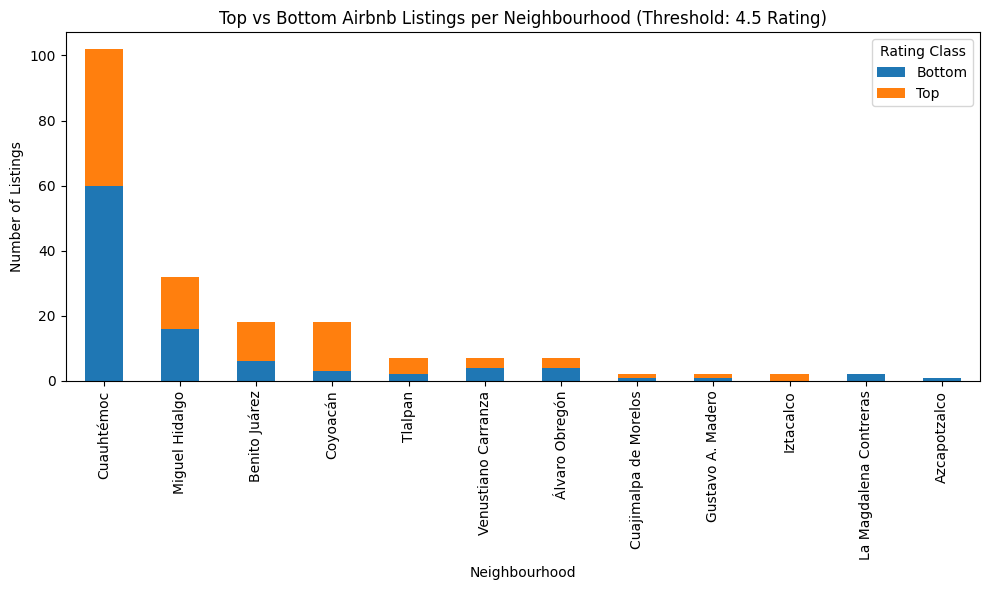

In [4]:
top_bottom_mexico_100['Rating_Class'] = ['Top' if rating > 4.5 else 'Bottom' for rating in top_bottom_mexico_100['review_scores_rating']]

# Group by neighbourhood and rating class to get counts
neighbourhood_counts = top_bottom_mexico_100.groupby(['neighbourhood_cleansed', 'Rating_Class']).size().unstack(fill_value=0)

neighbourhood_counts['Total'] = neighbourhood_counts.sum(axis=1)
neighbourhood_counts = neighbourhood_counts.sort_values('Total', ascending=False).drop(columns='Total')


# Plotting
neighbourhood_counts.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Top vs Bottom Airbnb Listings per Neighbourhood (Threshold: 4.5 Rating)')
plt.xlabel('Neighbourhood')
plt.ylabel('Number of Listings')
plt.legend(title='Rating Class')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()